In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading Dataset
df = pd.read_csv(r"C:\Users\physi\Downloads\sales 001 dataset.csv")

In [5]:
# basic information
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      300 non-null    object 
 1   Customer Name    300 non-null    object 
 2   Region           300 non-null    object 
 3   Sales Rep        300 non-null    object 
 4   Product          300 non-null    object 
 5   Lead Source      300 non-null    object 
 6   Deal Size (USD)  300 non-null    float64
 7   Deal Date        300 non-null    object 
dtypes: float64(1), object(7)
memory usage: 18.9+ KB


,Deal Size (USD)
count,300.000000
mean,14979.611667
std,4898.305017
min,1000.000000
25%,11583.772500
50%,15296.095000
75%,18133.290000
max,34263.660000


In [6]:
# Display few rows
df.head(3)

,Customer ID,Customer Name,Region,Sales Rep,Product,Lead Source,Deal Size (USD),Deal Date
0,1a2a73ed-562b-4f79-8374-59eef50bea63,"Tapia, Vaughn and Lee",North America,Noah Rhodes,Analytics Pro,Cold Call,17483.57,2024-09-09
1,5be6128e-18c2-4797-a142-ea7d17be3111,"Washington, Hardy and Bray",North America,Angie Henderson,RevOps Tracker,Referral,14308.68,2024-07-21
2,43b7a3a6-9a8d-4a03-980d-7b71d8f56413,"Carlson, Hooper and Wall",Asia,Allison Hill,DataViz Suite,Cold Call,18238.44,2024-09-02


### Data Cleaning and Preprocessing

In [8]:
# rename column names with relavant ones
df.rename(columns={'Sales Rep':'Sales Representative','Deal Size (USD)' : 'Revenue','Deal Date' : 'Date'},inplace =True)

In [11]:
# change date to date time dtype
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
#missing values 
df.isnull().sum()

Customer ID             0
Customer Name           0
Region                  0
Sales Representative    0
Product                 0
Lead Source             0
Revenue                 0
Date                    0
dtype: int64

In [13]:
# duplicate values
df.duplicated().sum()

np.int64(0)

In [24]:
# check data distribution around cat type data
cols = ['Product', 'Lead Source', 'Region','Sales Representative']

for col in cols:
    print(df[col].value_counts())
    print('\n')

Product
BI Booster        87
RevOps Tracker    78
Analytics Pro     68
DataViz Suite     67
Name: count, dtype: int64


Lead Source
Referral           67
Webinar            66
Cold Call          61
Inbound Website    54
Email Campaign     52
Name: count, dtype: int64


Region
North America    87
Europe           81
Asia             68
Africa           64
Name: count, dtype: int64


Sales Representative
Abigail Shaffer    49
Daniel Wagner      44
Gina Moore         40
Connie Lawrence    37
Cristian Santos    36
Allison Hill       33
Angie Henderson    31
Noah Rhodes        30
Name: count, dtype: int64




### Exploratory Data Analysis

In [20]:
df.head(3)

,Customer ID,Customer Name,Region,Sales Representative,Product,Lead Source,Revenue,Date
0,1a2a73ed-562b-4f79-8374-59eef50bea63,"Tapia, Vaughn and Lee",North America,Noah Rhodes,Analytics Pro,Cold Call,17483.57,2024-09-09
1,5be6128e-18c2-4797-a142-ea7d17be3111,"Washington, Hardy and Bray",North America,Angie Henderson,RevOps Tracker,Referral,14308.68,2024-07-21
2,43b7a3a6-9a8d-4a03-980d-7b71d8f56413,"Carlson, Hooper and Wall",Asia,Allison Hill,DataViz Suite,Cold Call,18238.44,2024-09-02


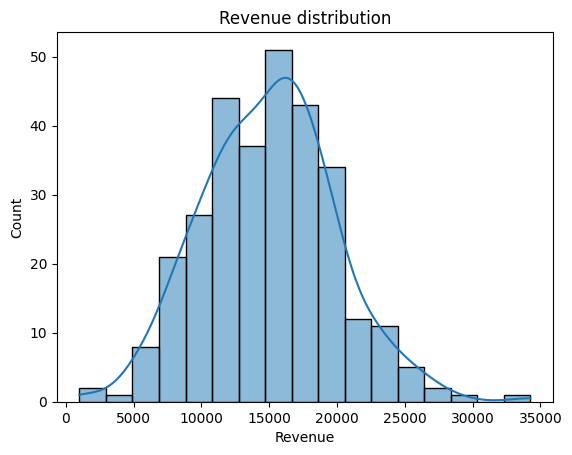

In [22]:
# univarient analysis
sns.histplot(df['Revenue'],kde=True)
plt.title('Revenue distribution')
plt.show()

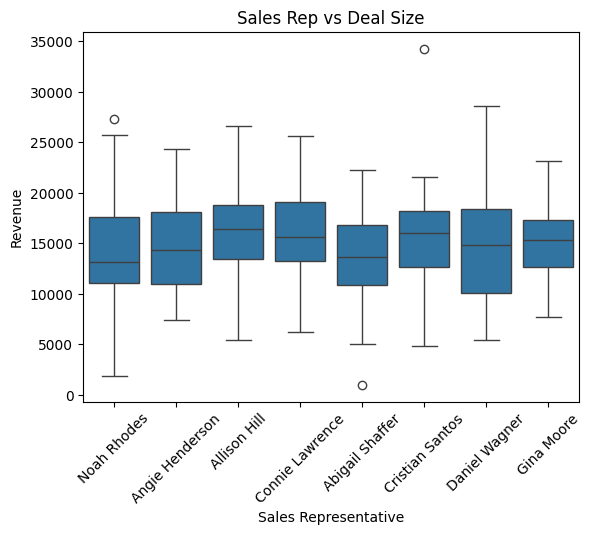

In [23]:
# Bivarient Analysis
sns.boxplot(x='Sales Representative', y='Revenue', data=df)
plt.xticks(rotation=45)
plt.title('Sales Rep vs Deal Size')
plt.show()

In [31]:
df = pd.get_dummies(df, columns=['Region', 'Sales Representative', 'Product', 'Lead Source'])

KeyError: "None of [Index(['Region', 'Sales Representative', 'Product', 'Lead Source'], dtype='object')] are in the [columns]"

In [33]:
print(df.columns)

Index(['Customer ID', 'Customer Name', 'Revenue', 'Date', 'Region_Africa',
       'Region_Asia', 'Region_Europe', 'Region_North America',
       'Sales Representative_Abigail Shaffer',
       'Sales Representative_Allison Hill',
       'Sales Representative_Angie Henderson',
       'Sales Representative_Connie Lawrence',
       'Sales Representative_Cristian Santos',
       'Sales Representative_Daniel Wagner', 'Sales Representative_Gina Moore',
       'Sales Representative_Noah Rhodes', 'Product_Analytics Pro',
       'Product_BI Booster', 'Product_DataViz Suite', 'Product_RevOps Tracker',
       'Lead Source_Cold Call', 'Lead Source_Email Campaign',
       'Lead Source_Inbound Website', 'Lead Source_Referral',
       'Lead Source_Webinar'],
      dtype='object')


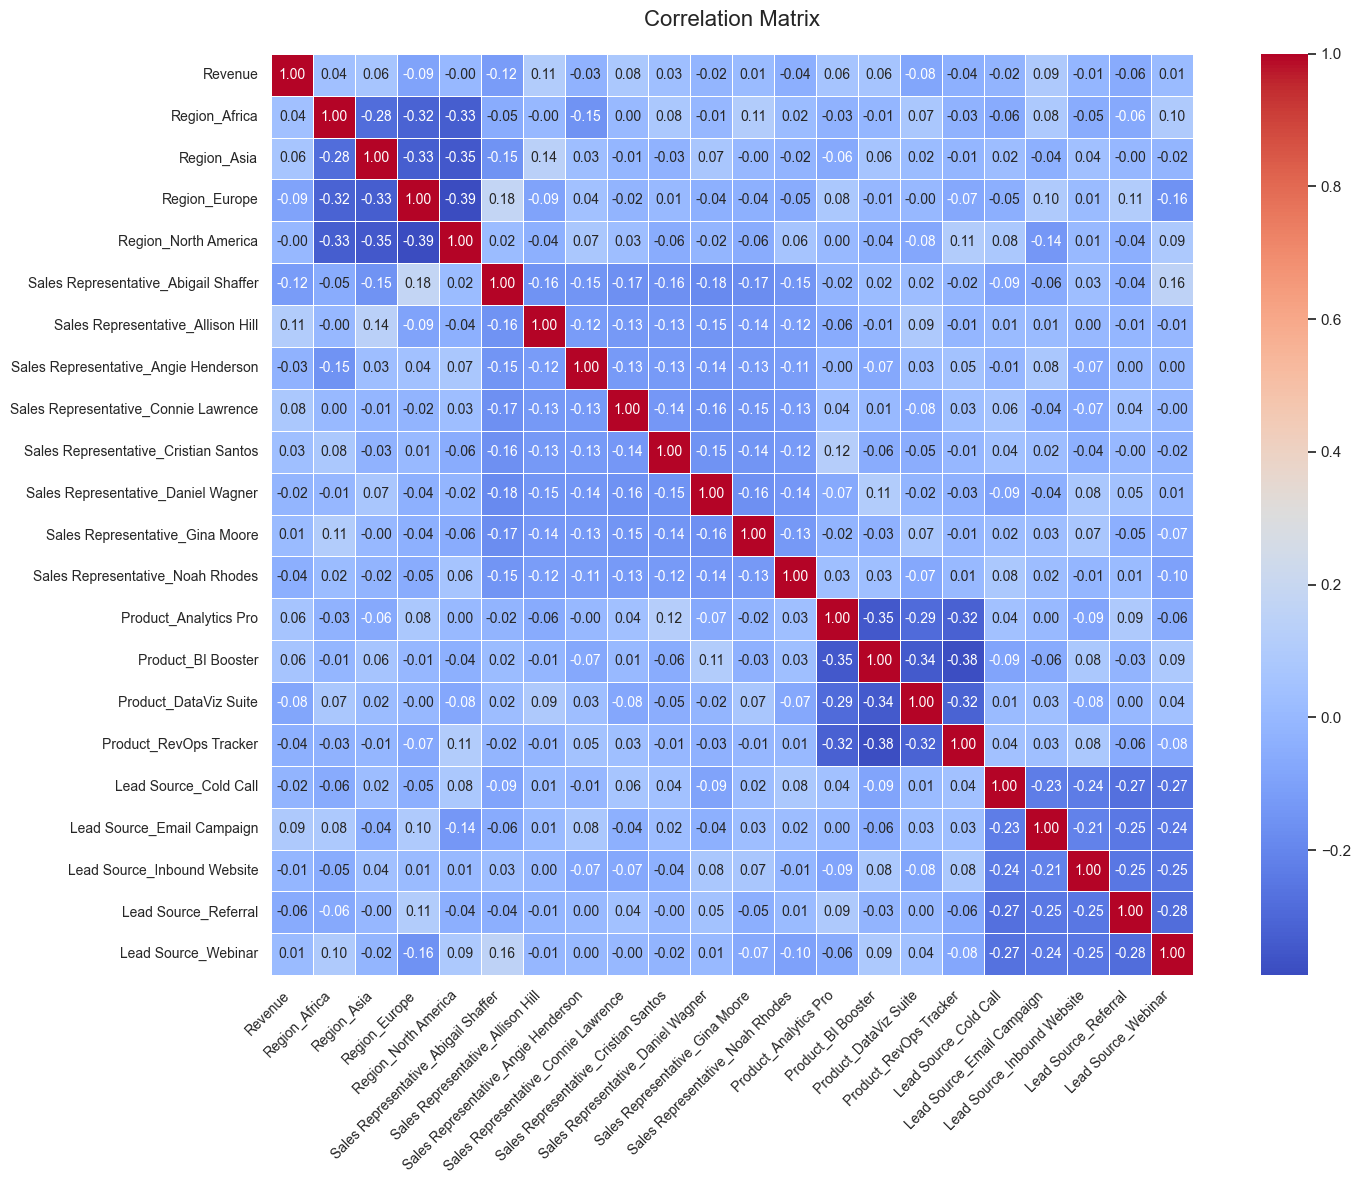

In [39]:
# Set up the figure size and style
plt.figure(figsize=(16, 12))  # Wider canvas
sns.set(style="white")

# Generate the correlation matrix from numeric/bool columns
corr_matrix = df.select_dtypes(include=['number', 'bool']).corr()

# Plot heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    square=True,
    linewidths=0.5,
    annot_kws={"size": 10}  # Smaller text to prevent overlap
)

# Improve tick labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Title
plt.title('Correlation Matrix', fontsize=16, pad=20)

# Layout fix
plt.tight_layout()
plt.show()

In [43]:
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].dt.to_timestamp()


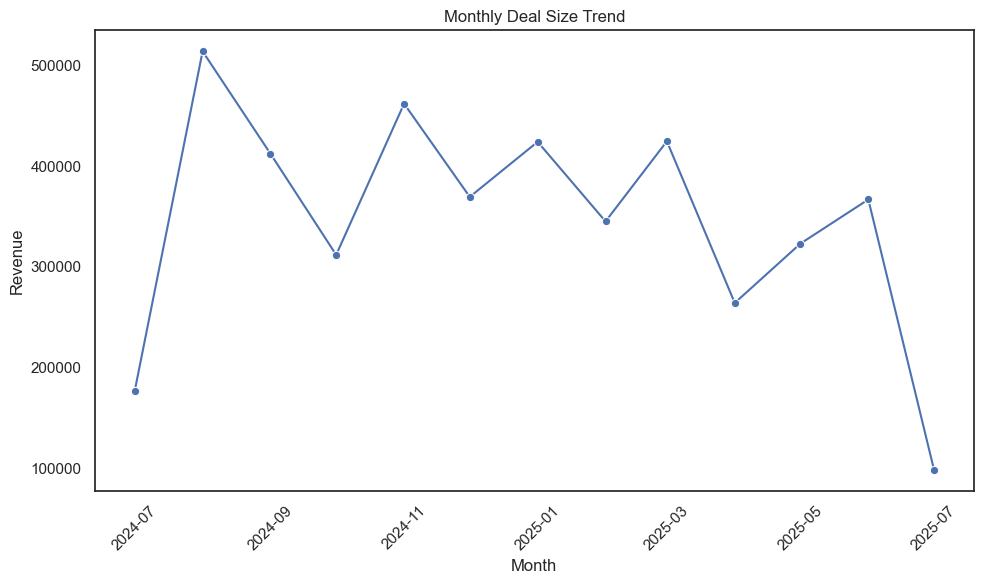

In [44]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year-Month', y='Revenue', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Deal Size Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()
